# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'
city_url=f'{url}appid={weather_api_key}&units={units}&q='

name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
latitude=[]
longitude=[]
maxtemp=[]
wind=[]
count=1

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
    response=requests.get(city_url + city).json()
        
    print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
    try:                                                # Ignore errors in response.
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])             
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])             
        maxtemp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])      
    except KeyError:
            
            print(city + ' city not found. Skipping...') # In case one of the responses comes back with error "KeyError"
                                                            # which could be the city or one of the data points missing.    
            count=count+1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 612 | albany
Processing Record 1 of 612 | provideniya
Processing Record 1 of 612 | bowen
Processing Record 1 of 612 | khatanga
Processing Record 1 of 612 | rikitea
Processing Record 1 of 612 | attawapiskat
attawapiskat city not found. Skipping...
Processing Record 2 of 612 | camacha
Processing Record 2 of 612 | kapaa
Processing Record 2 of 612 | port elizabeth
Processing Record 2 of 612 | mataura
Processing Record 2 of 612 | mamakan
Processing Record 2 of 612 | port alfred
Processing Record 2 of 612 | nanortalik
Processing Record 2 of 612 | vila velha
Processing Record 2 of 612 | cape town
Processing Record 2 of 612 | busselton
Processing Record 2 of 612 | sisimiut
Processing Record 2 of 612 | abha
Processing Record 2 of 612 | bathsheba
Processing Record 2 of 612 | hilo
Processing Record 2 of 612 | bemidji
Processing Record 2 of 612 | carnarvon
Processing Record 2 of 612 | hithadhoo
Processing Record 2 of 612

Processing Record 17 of 612 | faanui
Processing Record 17 of 612 | sierpc
Processing Record 17 of 612 | navalmoral de la mata
Processing Record 17 of 612 | jayanca
Processing Record 17 of 612 | roald
Processing Record 17 of 612 | tilichiki
Processing Record 17 of 612 | scottsburgh
scottsburgh city not found. Skipping...
Processing Record 18 of 612 | sapao
sapao city not found. Skipping...
Processing Record 19 of 612 | balakliya
Processing Record 19 of 612 | lubao
Processing Record 19 of 612 | ibia
Processing Record 19 of 612 | namibe
Processing Record 19 of 612 | coquimbo
Processing Record 19 of 612 | clyde river
Processing Record 19 of 612 | port lincoln
Processing Record 19 of 612 | boda
Processing Record 19 of 612 | kaitangata
Processing Record 19 of 612 | utiroa
utiroa city not found. Skipping...
Processing Record 20 of 612 | umzimvubu
umzimvubu city not found. Skipping...
Processing Record 21 of 612 | nuuk
Processing Record 21 of 612 | rocha
Processing Record 21 of 612 | samusu
sa

Processing Record 31 of 612 | khromtau
Processing Record 31 of 612 | tocopilla
Processing Record 31 of 612 | pangody
Processing Record 31 of 612 | soubre
Processing Record 31 of 612 | bloomfield
Processing Record 31 of 612 | dickinson
Processing Record 31 of 612 | pokhara
Processing Record 31 of 612 | labutta
labutta city not found. Skipping...
Processing Record 32 of 612 | port macquarie
Processing Record 32 of 612 | suez
Processing Record 32 of 612 | tabiauea
tabiauea city not found. Skipping...
Processing Record 33 of 612 | chiungutwa
Processing Record 33 of 612 | suntar
Processing Record 33 of 612 | yirol
yirol city not found. Skipping...
Processing Record 34 of 612 | atikokan
Processing Record 34 of 612 | kapit
Processing Record 34 of 612 | qasigiannguit
Processing Record 34 of 612 | conceicao da barra
Processing Record 34 of 612 | hohhot
Processing Record 34 of 612 | veraval
Processing Record 34 of 612 | illapel
Processing Record 34 of 612 | popondetta
Processing Record 34 of 612

Processing Record 51 of 612 | macas
Processing Record 51 of 612 | bolungarvik
bolungarvik city not found. Skipping...
Processing Record 52 of 612 | tabou
Processing Record 52 of 612 | verkhnevilyuysk
Processing Record 52 of 612 | mayumba
Processing Record 52 of 612 | sandwick
Processing Record 52 of 612 | nipawin
Processing Record 52 of 612 | severnoye
Processing Record 52 of 612 | moose factory
Processing Record 52 of 612 | arco
Processing Record 52 of 612 | superior
Processing Record 52 of 612 | punta de piedra
Processing Record 52 of 612 | paucartambo
paucartambo city not found. Skipping...
Processing Record 53 of 612 | borovskoy
Processing Record 53 of 612 | grand gaube
Processing Record 53 of 612 | tonj
Processing Record 53 of 612 | higuey
higuey city not found. Skipping...
Processing Record 54 of 612 | viligili
viligili city not found. Skipping...
Processing Record 55 of 612 | cairns
Processing Record 55 of 612 | taikang
Processing Record 55 of 612 | batagay
Processing Record 55 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
columns_dict = {
    'City': name,
    'Lat': latitude,
    'Lng': longitude,
    'Max Temp (F)': maxtemp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind,
    'Country': country,
    'Date': date}
weather_df=pd.DataFrame(columns_dict)
weather_df.count()
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Albany,42.6001,-73.9662,53.37,46,5,1.01,US,1667866582
1,Provideniya,64.3833,-173.3000,32.11,74,100,22.37,RU,1667866803
2,Bowen,-20.0167,148.2333,80.04,56,0,15.82,AU,1667866804
3,Khatanga,71.9667,102.5000,5.95,96,100,5.41,RU,1667866804
4,Rikitea,-23.1203,-134.9692,73.53,92,100,20.13,PF,1667866805


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

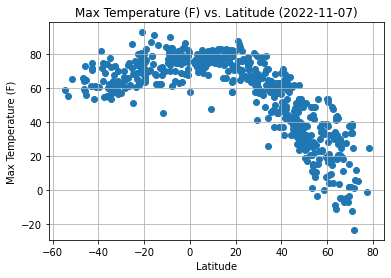

<Figure size 432x288 with 0 Axes>

In [22]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp (F)"]
plt.scatter(x_axis, y_axis)

plt.title("Max Temperature (F) vs. Latitude (2022-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

plt.savefig("../output_data/Fig1.png")

## Latitude vs. Humidity Plot

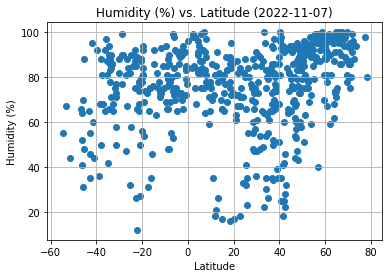

<Figure size 432x288 with 0 Axes>

In [23]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Humidity (%)"]
plt.scatter(x_axis, y_axis)

plt.title("Humidity (%) vs. Latitude (2022-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

plt.savefig("../output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

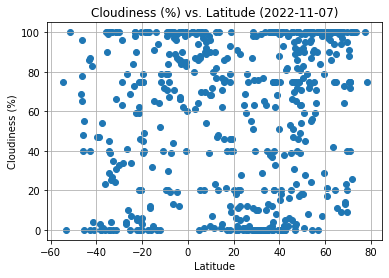

<Figure size 432x288 with 0 Axes>

In [24]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Cloudiness (%)"]
plt.scatter(x_axis, y_axis)

plt.title("Cloudiness (%) vs. Latitude (2022-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

plt.savefig("../output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

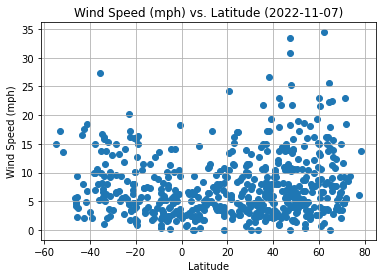

<Figure size 432x288 with 0 Axes>

In [25]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Wind Speed (mph)"]
plt.scatter(x_axis, y_axis)

plt.title("Wind Speed (mph) vs. Latitude (2022-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [29]:
def Linear_Regression_Plots(x,y):
    slope, intercept, r, p, stderr = linregress(x,y)

    plt.plot(x, x * slope + intercept, color="r")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.legend([line_eq], labelcolor='r')
    print(f"The r-value is: {r*r}")

weather_north = weather_df[weather_df['Lat'] >= 0]
weather_south = weather_df[weather_df['Lat'] < 0]
weather_north.head()
#weather_south.head()


,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Albany,42.6001,-73.9662,53.37,46,5,1.01,US,1667866582
1,Provideniya,64.3833,-173.3000,32.11,74,100,22.37,RU,1667866803
3,Khatanga,71.9667,102.5000,5.95,96,100,5.41,RU,1667866804
5,Camacha,33.0833,-16.3333,62.02,100,20,2.30,PT,1667866805
6,Kapaa,22.0752,-159.3190,84.18,72,20,13.80,US,1667866806


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7352110121300841


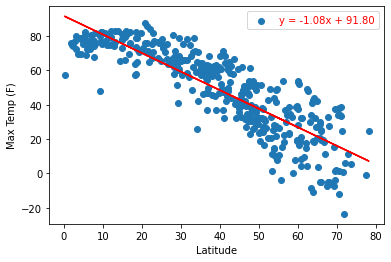

In [30]:
x_axis = weather_north["Lat"]
y_axis = weather_north["Max Temp (F)"]
plt.scatter(x_axis, y_axis)
Linear_Regression_Plots(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.32086093437668545


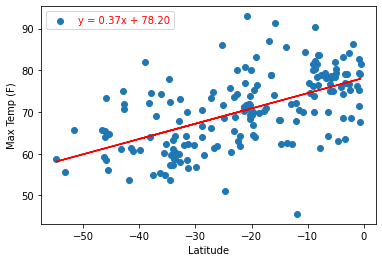

In [31]:
x_axis = weather_south["Lat"]
y_axis = weather_south["Max Temp (F)"]
plt.scatter(x_axis, y_axis)
Linear_Regression_Plots(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07214828809775514


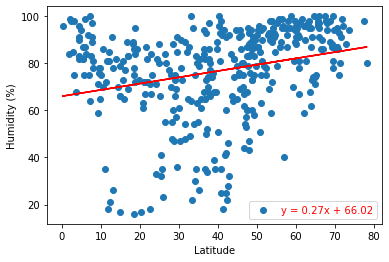

In [32]:
x_axis = weather_north["Lat"]
y_axis = weather_north["Humidity (%)"]
plt.scatter(x_axis, y_axis)
Linear_Regression_Plots(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.069361725548976


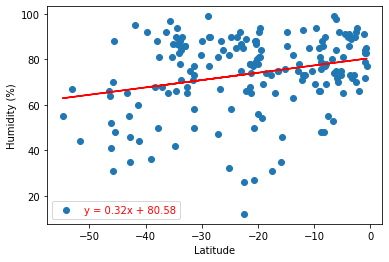

In [33]:
x_axis = weather_south["Lat"]
y_axis = weather_south["Humidity (%)"]
plt.scatter(x_axis, y_axis)
Linear_Regression_Plots(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04690842741742436


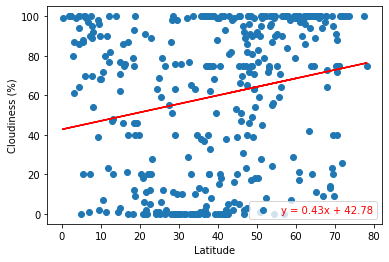

In [34]:
x_axis = weather_north["Lat"]
y_axis = weather_north["Cloudiness (%)"]
plt.scatter(x_axis, y_axis)
Linear_Regression_Plots(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07861414303831821


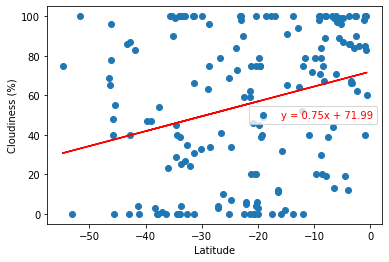

In [35]:
x_axis = weather_south["Lat"]
y_axis = weather_south["Cloudiness (%)"]
plt.scatter(x_axis, y_axis)
Linear_Regression_Plots(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05726977121528452


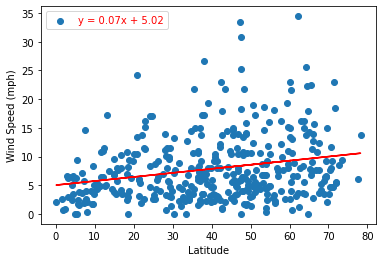

In [36]:
x_axis = weather_north["Lat"]
y_axis = weather_north["Wind Speed (mph)"]
plt.scatter(x_axis, y_axis)
Linear_Regression_Plots(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07909815241695992


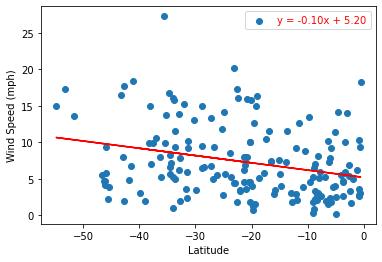

In [37]:
x_axis = weather_south["Lat"]
y_axis = weather_south["Wind Speed (mph)"]
plt.scatter(x_axis, y_axis)
Linear_Regression_Plots(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()